In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 

Data contains information on labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months for Yukon, Northwest Territories and Nunavut. 

Data set is obtained from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201 via ProductID 14100292. 


We implement a friendly user interface based on buttons and dropdown menus that allows the user to explore multiple data sets and subsets of data for a specified date and classification. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}


<h2 align='center'>Downloading Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="14100292",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(prod_ID)
display(DS_button)

Text(value='14100292', description='productID value', placeholder='ProductID value', style=DescriptionStyle(de…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [5]:
from IPython.core.display import HTML
HTML(
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
    "<p align='center'> Downloading Full Dataset</p>"
    "<p align='center'> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ </p>"
)

In [6]:
# # Download data 
productId = prod_ID.value

download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df


# Example
#data = download_and_store_json(productId)

# Example, we will select the study we downloaded previously 

df_fullDATA = zip_table_to_dataframe(productId)



df_fullDATA.head()


PARSING DATA AS PANDAS DATAFRAME


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438711,1.1.1.1.1.1,18.3,NaN,NaN,NaN,1
1,1992-03-01,Yukon,2016A000260,Population,Both sexes,15 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438712,1.1.1.1.1.2,18.3,NaN,NaN,NaN,1
2,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438713,1.1.1.2.1.1,14.7,NaN,NaN,NaN,1
3,1992-03-01,Yukon,2016A000260,Population,Both sexes,25 years and over,Estimate,Unadjusted,Persons,249,thousands,3,v46438714,1.1.1.2.1.2,14.7,NaN,NaN,NaN,1
4,1992-03-01,Yukon,2016A000260,Population,Males,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v46438715,1.1.2.1.1.1,9.4,NaN,NaN,NaN,1


<h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [7]:
subcategories = df_fullDATA.iloc[:,3].unique()
values = df_fullDATA.iloc[:,10].unique()
dates = df_fullDATA.iloc[:,0].unique()
geog = df_fullDATA.iloc[:,1].unique()
age_group = df_fullDATA.iloc[:,5].unique()
sex = df_fullDATA.iloc[:,4].unique()
data_type = df_fullDATA.iloc[:,7].unique()
statistics = df_fullDATA.iloc[:,6].unique()

datasets_dp = widgets.Dropdown(
    options = subcategories, 
    description ='Select category:', 
    style = style, 
    disabled=False
)

geo_dp = widgets.Dropdown(
    options = geog, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

age_group_gp = widgets.Dropdown(
    options = age_group, 
    description ='Select age group:', 
    style = style, 
    disabled=False
)

statistics_dp = widgets.Dropdown(
    options = statistics, 
    description ='Select statistics type:', 
    style = style, 
    disabled=False
)

sex_gp = widgets.Dropdown(
    options = sex, 
    description ='Select gender identity:', 
    style = style, 
    disabled=False
)


data_type_gp = widgets.Dropdown(
    options = data_type, 
    description ='Select data type:', 
    style = style, 
    disabled=False
)


sdates_dp = widgets.Dropdown(
    value = dates[0],
    options = dates, 
    description ='Select starting date:', 
    style = style, 
    disabled=False
)

edates_dp = widgets.Dropdown(
    value = dates[-1],
    options = dates, 
    description ='Select end date:', 
    style = style, 
    disabled=False
)

CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )


tab3 = VBox(children=[HBox(children=[geo_dp,datasets_dp]),
                      HBox(children=[sdates_dp,edates_dp]),
                      HBox(children=[sex_gp,age_group_gp]),
                      HBox(children=[data_type_gp,statistics_dp]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
subdata = datasets_dp.value
sdate = sdates_dp.value
edate = edates_dp.value
esex = sex_gp.value
eage = age_group_gp.value
edatatype = data_type_gp.value
geoLoc = geo_dp.value
stat = statistics_dp.value

In [32]:
df_subdata = df_fullDATA[df_fullDATA.iloc[:,3]==subdata]
df_subdata_time = df_subdata[(df_subdata['REF_DATE'] >= sdate) & (df_subdata['REF_DATE'] <= edate)]
df_subdata_time_sex = df_subdata_time[df_subdata_time["Sex"]==esex]
df_subdata_time_sex_age = df_subdata_time_sex[df_subdata_time_sex["Age group"]==eage]
df_subdata_time_sex_age_dt = df_subdata_time_sex_age[df_subdata_time_sex_age["Data type"]==edatatype]
df_subdata_time_sex_age_dt_geo = df_subdata_time_sex_age_dt[df_subdata_time_sex_age_dt["GEO"]==geoLoc]
df_subdata_time_sex_age_dt_geo_val = df_subdata_time_sex_age_dt_geo[df_subdata_time_sex_age_dt_geo["Statistics"]==stat]
df_subdata_time_sex_age_dt_geo_val.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
11316,2001-01-01,Nunavut,2016A000262,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v99443840,3.6.1.1.1.1,NaN,..,NaN,NaN,1
11946,2001-02-01,Nunavut,2016A000262,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v99443840,3.6.1.1.1.1,NaN,..,NaN,NaN,1
12576,2001-03-01,Nunavut,2016A000262,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v99443840,3.6.1.1.1.1,NaN,..,NaN,NaN,1
13206,2001-04-01,Nunavut,2016A000262,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v99443840,3.6.1.1.1.1,NaN,..,NaN,NaN,1
13836,2001-05-01,Nunavut,2016A000262,Unemployment,Both sexes,15 years and over,Estimate,Seasonally adjusted,Persons,249,thousands,3,v99443840,3.6.1.1.1.1,NaN,..,NaN,NaN,1


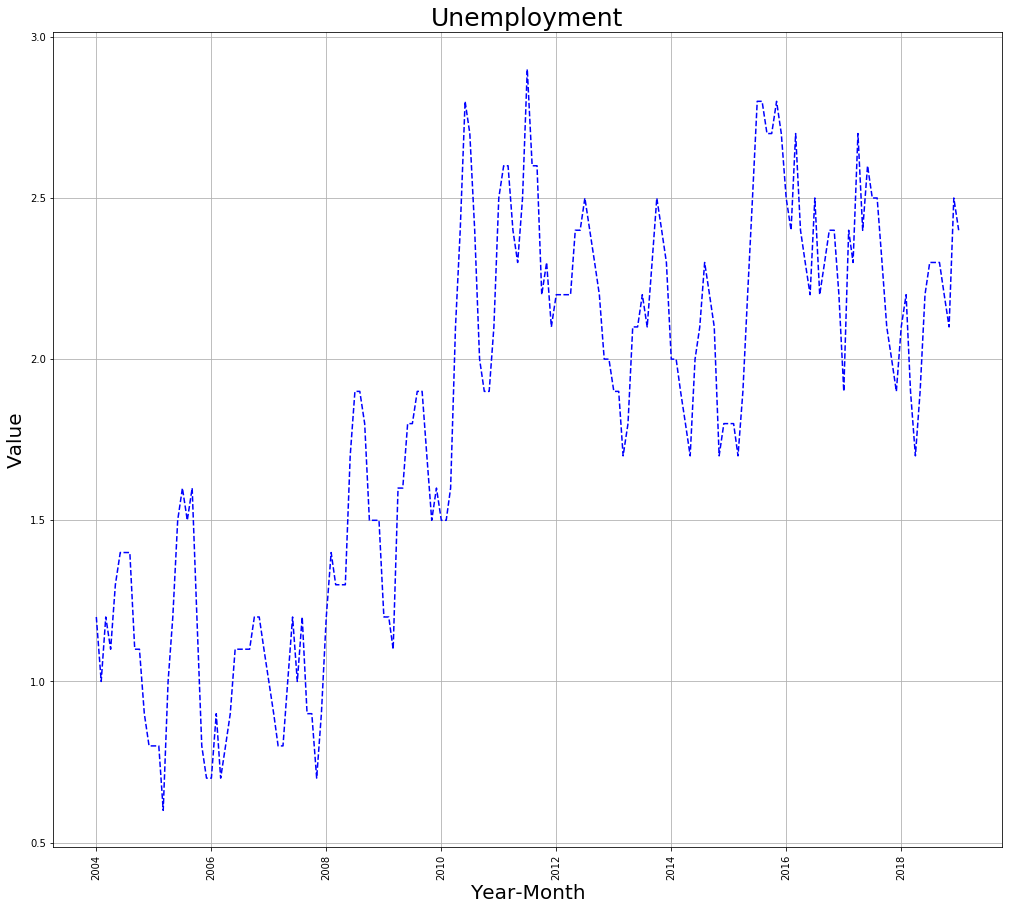

In [33]:

import matplotlib.pyplot as plt

fig = plt.figure(facecolor='w',figsize=(17,15))
ax  = fig.add_subplot(111,facecolor = '#ffffff')

plt.plot(df_subdata_time_sex_age_dt_geo_val["REF_DATE"],df_subdata_time_sex_age_dt_geo_val["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(subdata,fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

<h2 align='center'>Cross-Comparison Across Regions and Gender</h2>

Let us dig a little deeper into the data.

Let us get employment rate for females and males across Yukon, Northwest Territories and Nunavut from 2004 until 2018. We display a table for Nunavut and plot results for all regions and gender identities for the years 2009 and 2018. 

In [34]:
df_fullDATA_clean = df_fullDATA.drop(columns=["DGUID","UOM_ID","UOM","SCALAR_ID","VECTOR","COORDINATE","STATUS","TERMINATED",\
              "DECIMALS","SYMBOL"])

#df_fullDATA_clean.head()#

In [12]:
def get_year_pd(dataframe,syear,eyear):
    df_year = dataframe.loc[(dataframe['REF_DATE'] >= syear) & (dataframe['REF_DATE'] <= eyear)]
    df4 = df_year.rename(index=str, columns={"VALUE": syear.split("-")[0],"GEO":"Geography"})
    df4 = df4.drop(columns="REF_DATE")

    return df4

def get_employment_rate_gi_loc(year_df,gender_id,location):
    
    df_s = year_df[(year_df["Sex"]==gender_id) ]
    
    df_s_ag =  df_s[(df_s["Age group"]=="25 years and over")]
    
    df_s_ag_loc = df_s_ag[(df_s_ag["Geography"]==location)]
    
    df_s_ag_loc_dt = df_s_ag_loc[(df_s_ag_loc["Data type"]=="Unadjusted")]
    
    df_s_ag_loc_dt_st = df_s_ag_loc_dt[df_s_ag_loc_dt["Statistics"]=="Estimate"]
    
    df = df_s_ag_loc_dt_st[df_s_ag_loc_dt_st["Labour force characteristics"]=="Employment rate"]
    
    #df = df.drop(columns="SCALAR_FACTOR")
    
    return df



In [13]:
def get_all_years(gend_id,location):
    all_dfs_yukon = []
    for i in range(2004,2019):
        df_test = get_year_pd(df_fullDATA_clean,str(i)+"-01-01	",str(i)+"-12-01")
        df_specific  = get_employment_rate_gi_loc(df_test,gend_id,location)
        all_dfs_yukon.append(df_specific)

    dfs = [all_dfs_yukon[i] for i in range(len(all_dfs_yukon))]
    cols = ['Geography', 'Labour force characteristics', 'Sex','Age group','Statistics','Data type','SCALAR_FACTOR']
    keys = [str(2004 + i) for i in range(len(all_dfs_yukon))]
    concat_df = pd.concat(
        [df.set_index(cols) for df in dfs],
        axis=1)

    return concat_df

yuk = get_all_years("Females","Yukon")
nt = get_all_years("Females","Northwest Territories")
nu = get_all_years("Females","Nunavut")

yukm = get_all_years("Males","Yukon")
ntm = get_all_years("Males","Northwest Territories")
num = get_all_years("Males","Nunavut")

In [14]:
nu

2004  \
Geography Labour force characteristics Sex     Age group         Statistics Data type  SCALAR_FACTOR         
Nunavut   Employment rate              Females 25 years and over Estimate   Unadjusted units          62.8   
                                                                                       units          62.8   
                                                                                       units          63.5   
                                                                                       units          65.0   
                                                                                       units          64.8   
                                                                                       units          61.5   
                                                                                       units          59.3   
                                                                                       units          59.1   
                                                                                       units          62.2   
                                                                                       units          60.7   
                                                                                       units          60.6   
                                                                                       units          59.0   

                                                                                                      2005  \
Geography Labour force characteristics Sex     Age group         Statistics Data type  SCALAR_FACTOR         
Nunavut   Employment rate              Females 25 years and over Estimate   Unadjusted units          59.8   
                                                                                       units          62.0   
                                                                                       units          58.5   
                                                                                       units          57.0   
                                                                                       units          54.7   
                                                                                       units          54.8   
                                                                                       units          55.0   
                                                                                       units          55.1   
                                                                                       units          58.7   
                                                                                       units          60.9   
                                                                                       units          62.7   
                                                                                       units          61.3   

                                                                                                      2006  \
Geography Labour force characteristics Sex     Age group         Statistics Data type  SCALAR_FACTOR         
Nunavut   Employment rate              Females 25 years and over Estimate   Unadjusted units          60.7   
                                                                                       units          60.1   
                                                                                       units          60.9   
                                                                                       units          61.9   
                                                                                       units          64.5   
                                                                                       units          65.9   
                                                                                       units          65.9   
                              

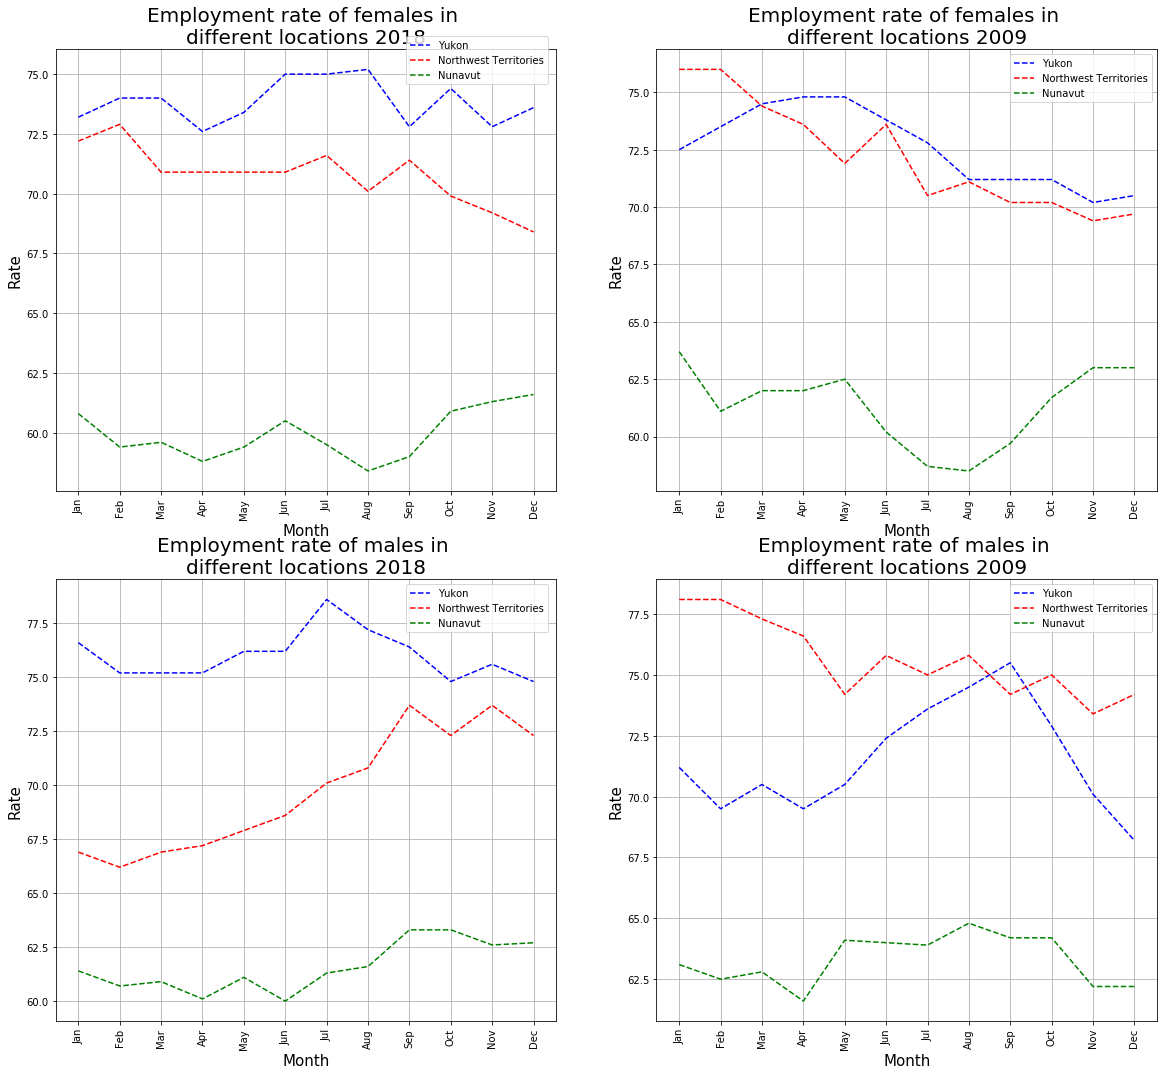

In [15]:

fig2 = plt.figure(facecolor='w',figsize=(17,15))

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.subplot(2, 2, 1)
plt.plot(months,yuk["2018"],'b--',label='Value')
plt.plot(months,nt["2018"],'r--',label='Value')
plt.plot(months,nu["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(0.69,0.91))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.title("Employment rate of females in \ndifferent locations 2018",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(months,yuk["2009"],'b--',label='Value')
plt.plot(months,nt["2009"],'r--',label='Value')
plt.plot(months,nu["2009"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(1,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.title("Employment rate of females in \ndifferent locations 2009",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(months,yukm["2018"],'b--',label='Value')
plt.plot(months,ntm["2018"],'r--',label='Value')
plt.plot(months,num["2018"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(0.69,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.title("Employment rate of males in \ndifferent locations 2018",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(months,yukm["2009"],'b--',label='Value')
plt.plot(months,ntm["2009"],'r--',label='Value')
plt.plot(months,num["2009"],'g--',label='Value')
plt.legend(["Yukon", "Northwest Territories","Nunavut"],bbox_to_anchor=(1,1))
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.title("Employment rate of males in \ndifferent locations 2009",fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


plt.subplots_adjust(bottom=0.0001, right=1, top=0.9,left=0.1)

plt.show()

<h2 align='center'>References</h2>

Statistics Canada.  Table  14-10-0292-01   Labour force characteristics by territory, three-month moving average, seasonally adjusted and unadjusted, last 5 months. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029201


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)